# Homework DSP Discrete Signal Processing (2019/01/14締切)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li></ul></li><li><span><a href="#Sample1" data-toc-modified-id="Sample1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sample1</a></span><ul class="toc-item"><li><span><a href="#stem(x)" data-toc-modified-id="stem(x)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>stem(x)</a></span></li><li><span><a href="#specgram(x)" data-toc-modified-id="specgram(x)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>specgram(x)</a></span><ul class="toc-item"><li><span><a href="#matplotlib.pyplot.specgram" data-toc-modified-id="matplotlib.pyplot.specgram-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>matplotlib.pyplot.specgram</a></span></li><li><span><a href="#TODO-自作spectgram" data-toc-modified-id="TODO-自作spectgram-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>TODO 自作spectgram</a></span></li></ul></li><li><span><a href="#power-spectrum---dB" data-toc-modified-id="power-spectrum---dB-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>power spectrum - dB</a></span></li><li><span><a href="#Convolve(x,h)" data-toc-modified-id="Convolve(x,h)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Convolve(x,h)</a></span></li><li><span><a href="#stem(y)" data-toc-modified-id="stem(y)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>stem(y)</a></span></li><li><span><a href="#spctgram(y)" data-toc-modified-id="spctgram(y)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>spctgram(y)</a></span></li><li><span><a href="#power-spectrum---dB" data-toc-modified-id="power-spectrum---dB-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>power spectrum - dB</a></span></li><li><span><a href="#matlab-wavewrite" data-toc-modified-id="matlab-wavewrite-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>matlab wavewrite</a></span></li></ul></li></ul></div>

## Config

### Import

In [50]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

seed=0
np.random.seed(seed)

## Sample1

- 階差数列を実現するLTIシステム
  - $h[n] = \delta[n] - \delta[n-1]$
- 入力信号$x[n]$に対する畳み込み$x[n]*h[n]$を考える

畳み込みの復習

\begin{align*}
x[n]*h[n] := \sum_{k=-\infty}^{\infty} x[k] \cdot h[n-k]
\end{align*}

- サンプリング周波数:16kHz

\begin{align*}
x = \sin \left( 2 \pi f t \right)
\end{align*}

In [104]:
fs = 16000              # サンプリング周波数:16kHz
t = np.arange(fs) / fs  # 離散時間 (１秒間)

freq = 1000                 # frequency
x = np.sin(2*np.pi*freq*t)  # 波形

In [107]:
# 音声ファイル作成
from scipy.io import wavfile

_wave_file = "./sample01_x.wav"
_x = np.float32(x)
wavfile.write(filename=_wave_file,
              rate=fs,  # サンプリング周波数
              data=_x)

### stem(x)

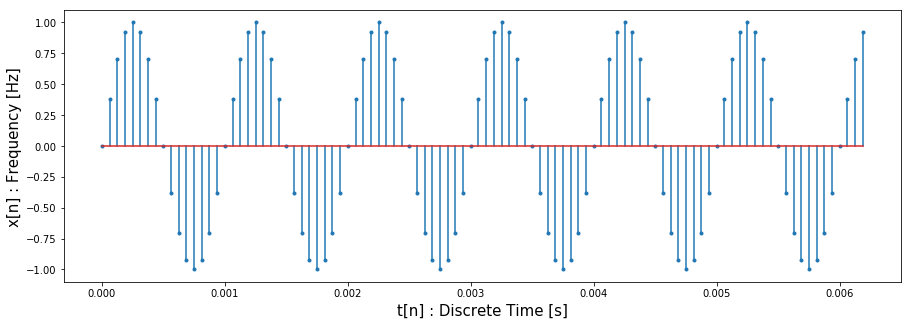

In [90]:
idx_start = 0
idx_end   = 100

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.stem(t[idx_start:idx_end], x[idx_start:idx_end],
        linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="x[n] : Frequency [Hz]",    fontsize=15)
plt.show()

### specgram(x)

- [スペクトログラム - Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B9%E3%83%9A%E3%82%AF%E3%83%88%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0)
  - > スペクトログラムを作成する方法は主に2種類存在する.
      1つはバンドパスフィルタ群を使う方法,もう1つは短時間フーリエ変換(STFT)で計算する方法である.
- [matplotlib.pyplot.specgram — Matplotlib 3.0.2 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.specgram.html)
  - > data in x. Data are split into NFFT length segments and the spectrum of each section is computed
  - > The windowing function window is applied to each segment
- [Spectrogram Demo — Matplotlib 3.0.2 documentation](https://matplotlib.org/gallery/images_contours_and_fields/specgram_demo.html#sphx-glr-gallery-images-contours-and-fields-specgram-demo-py)
- [短時間フーリエ変換(STFT) - numpyでスペクトログラムによる音楽信号の可視化 - Qiita](https://qiita.com/namaozi/items/dec1575cd455c746f597#%E7%9F%AD%E6%99%82%E9%96%93%E3%83%95%E3%83%BC%E3%83%AA%E3%82%A8%E5%A4%89%E6%8F%9Bstft)
- [ハミング窓 - 窓関数 - Wikipedia](https://ja.wikipedia.org/wiki/%E7%AA%93%E9%96%A2%E6%95%B0#%E3%83%8F%E3%83%9F%E3%83%B3%E3%82%B0%E7%AA%93)
  - > ハン窓と並び、最もよく使われる窓関数の一つ。ハン窓より周波数分解能が良く、ダイナミック・レンジが狭い。区間の両端で不連続なのが特徴。
  - > $w(x) = 0.54 - 0.46 \cdot \cos \left( 2 \pi x \right) \ \ (\text{if} 0 < x \lt 1)$
- [matplotlib.mlab.window_hanning(x) — Matplotlib 3.0.2 documentation](https://matplotlib.org/api/mlab_api.html#matplotlib.mlab.window_hanning)

縦軸の$max$は標本化周波数$fs$の$1/2$


#### matplotlib.pyplot.specgram

_spectrum.shape: (129, 124)
_freqs.shape   : (129,)
_t.shape       : (124,)
_spectrum[0,:4]: [9.58937834e-14 9.58937834e-14 9.58937833e-14 9.58937833e-14]
_freqs[:4]     : [  0.   62.5 125.  187.5]
_t[:4]         : [0.008 0.016 0.024 0.032]


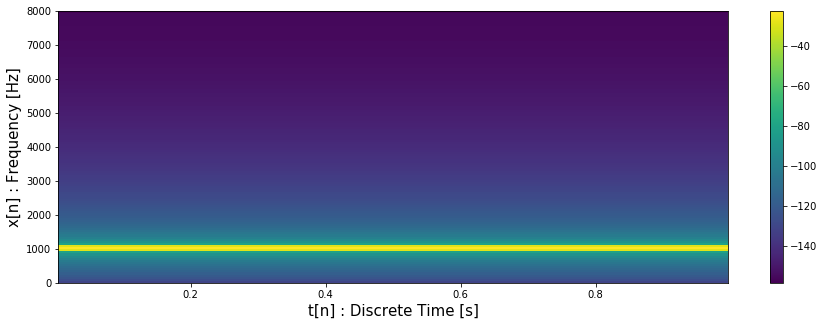

In [91]:
# 波形xのspectgram

idx_start = 0
idx_end   = len(x)
NFFT      = 256
noverlap  = NFFT / 2

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

# specgram : STFT (short-time fourier transform) の計算をしているだけ
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=x[idx_start:idx_end],  # data
                NFFT=NFFT,               # The number of data points used in each block for the FFT.
                Fs=fs,                   # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                noverlap=128)            # STFTのずらし幅
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="x[n] : Frequency [Hz]",    fontsize=15)
fig.colorbar(mappable=_im, ax=ax)

print("="*40)
print("_spectrum.shape: {}".format(_spectrum.shape))
print("_freqs.shape   : {}".format(_freqs.shape))
print("_t.shape       : {}".format(_t.shape))
print("="*40)
print("_spectrum[0,:4]: {}".format(_spectrum[0,:4]))
print("_freqs[:4]     : {}".format(_freqs[:4]))
print("_t[:4]         : {}".format(_t[:4]))
print("="*40)

plt.show()

_spectrum.shape: (129, 6)
_freqs.shape   : (129,)
_t.shape       : (6,)
_spectrum[0,:4]: [1.08303240e-14 1.08303240e-14 1.08303241e-14 1.08303239e-14]
_freqs[:4]     : [  0.   62.5 125.  187.5]
_t[:4]         : [0.008 0.016 0.024 0.032]


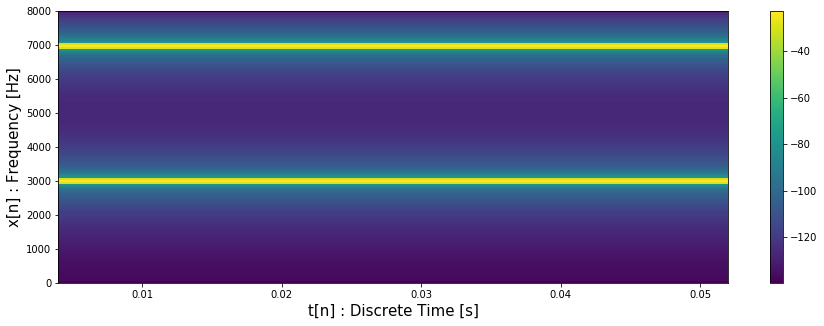

In [92]:
# 3kHz, 7kHz の周波数波形のspectgram

idx_start = 0
idx_end   = 1000
NFFT      = 256
_x        = np.sin(2*np.pi*3000*t) + np.sin(2*np.pi*7000*t)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=_x[idx_start:idx_end], # data
                NFFT=NFFT,               # The number of data points used in each block for the FFT.
                Fs=fs,                   # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                noverlap=128)            # STFTのずらし幅
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="x[n] : Frequency [Hz]",    fontsize=15)
fig.colorbar(mappable=_im, ax=ax)

print("="*40)
print("_spectrum.shape: {}".format(_spectrum.shape))
print("_freqs.shape   : {}".format(_freqs.shape))
print("_t.shape       : {}".format(_t.shape))
print("="*40)
print("_spectrum[0,:4]: {}".format(_spectrum[0,:4]))
print("_freqs[:4]     : {}".format(_freqs[:4]))
print("_t[:4]         : {}".format(_t[:4]))
print("="*40)

plt.show()

#### TODO 自作spectgram
- STFT short-time fourier transform

### power spectrum - dB

In [112]:
# 普通の高速フーリエ変換なのでサンプリング周期分だけ返す
x_fourier = np.fft.fft(a=x)
print("x_fourier[0].shape: {}".format(x_fourier.shape))
print("x_fourier[0]      : {}".format(x_fourier[0]))

x_fourier[0].shape: (16000,)
x_fourier[0]      : (2.661322692627543e-12+0j)


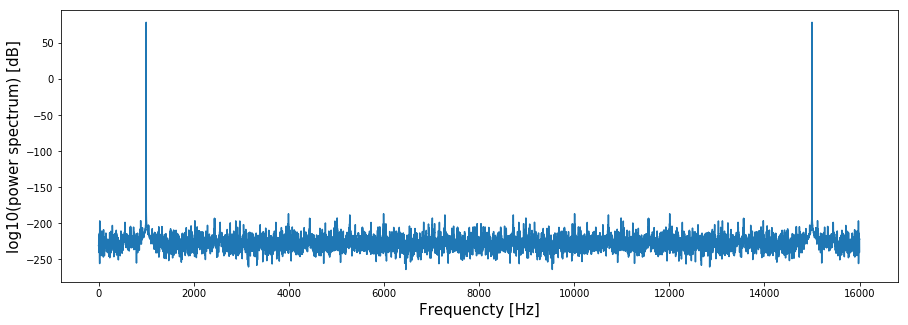

In [94]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(20*np.log10(abs(x_fourier)))
ax.set_xlabel(xlabel="Frequencty [Hz]",            fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
plt.show()

In [95]:
# rfft は入力信号が実数のみのときに使う
# よって,軸で左右対称なのでサンプリング周波数の半分のみ返せば十分)
x_fourier = np.fft.rfft(a=x)
print("x_fourier[0].shape: {}".format(x_fourier.shape))
print("x_fourier[0]      : {}".format(x_fourier[0]))

(2.765683656942296e-12+0j)

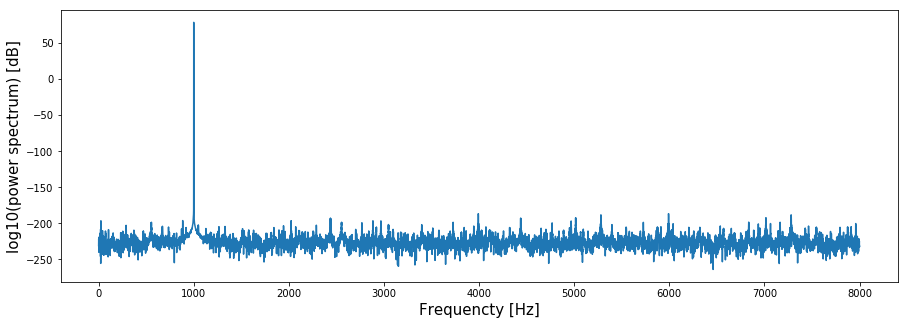

In [96]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(20*np.log10(abs(x_fourier)))
ax.set_xlabel(xlabel="Frequencty [Hz]",            fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
plt.show()

### Convolve(x,h)

- [畳み込み積分や移動平均を求めるnumpy.convolve関数の使い方 - DeepAge](https://deepage.net/features/numpy-convolve.html)
- [numpy.convolve — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.convolve.html)
  - $(a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m]$


\begin{align*}
h[n] = \delta[n] - \delta[n-1]
\end{align*}


> - mode : {‘full’, ‘valid’, ‘same’}, optional
    - __'full'__ : By default, mode is 'full'.
      This returns the convolution at each point of overlap, with an output shape of (N+M-1,).
      At the end-points of the convolution, the signals do not overlap completely,
      and boundary effects may be seen.
    - __'same'__ : Mode 'same' returns output of length max(M, N). Boundary effects are still visible.
    - __'valid'__ : Mode 'valid' returns output of length max(M, N) - min(M, N) + 1.
      The convolution product is only given for points where the signals overlap completely.
      Values outside the signal boundary have no effect.

In [97]:
h = np.array([1, -1])
y = np.convolve(a=x, v=h, mode="full")

print("x.shape: {}".format(x.shape))
print("y.shape: {} = {} + {} - 1".format(y.shape, x.shape[0], h.shape[0] ))

x.shape: (16000,)
y.shape: (16001,) = 16000 + 2 - 1


### stem(y)
- 階差数列をとる $\simeq$ 微分する
- $\sin(x)$の階差 $\simeq$  $\cos(x)$


- LTI (linear time-invariant system) なので
  - 周波数は不変
  - 位相は変化 ($\pi$だけ変化)
  - 振幅は変化

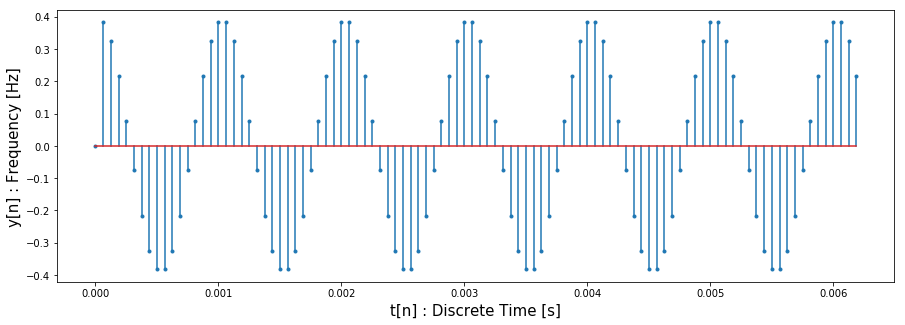

In [98]:
idx_start = 0
idx_end   = 100

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.stem(t[idx_start:idx_end], y[idx_start:idx_end],
        linefmt="C0-" , markerfmt='.', basefmt='C3-')
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="y[n] : Frequency [Hz]",    fontsize=15)
plt.show()

### spctgram(y)
- LTI (linear time-invariant system) なので, 周波数は変わっていないことがわかる

_spectrum.shape: (129, 124)
_freqs.shape   : (129,)
_t.shape       : (124,)
_spectrum[0,:4]: [3.27401856e-13 3.27401856e-13 3.27401856e-13 3.27401856e-13]
_freqs[:4]     : [  0.   62.5 125.  187.5]
_t[:4]         : [0.008 0.016 0.024 0.032]


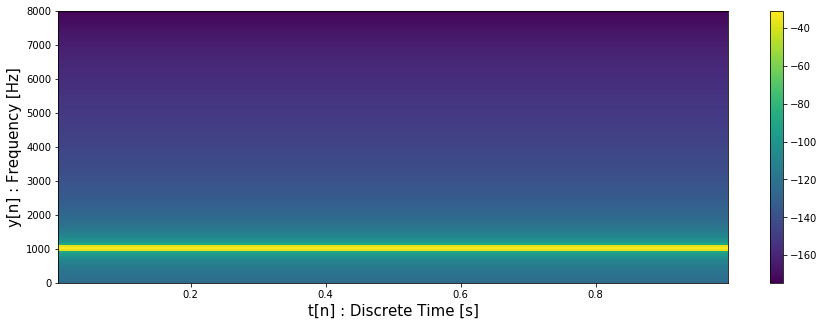

In [99]:
idx_start = 0
idx_end   = len(y)
NFFT      = 256
noverlap  = NFFT / 2

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

# specgram : STFT (short-time fourier transform) の計算をしているだけ
_spectrum, _freqs, _t, _im = \
    ax.specgram(x=y[idx_start:idx_end],  # data
                NFFT=NFFT,               # The number of data points used in each block for the FFT.
                Fs=fs,                   # sampling frequency
                window=matplotlib.mlab.window_hanning,  # 窓関数
                noverlap=128)            # STFTのずらし幅
ax.set_xlabel(xlabel="t[n] : Discrete Time [s]", fontsize=15)
ax.set_ylabel(ylabel="y[n] : Frequency [Hz]",    fontsize=15)
fig.colorbar(mappable=_im, ax=ax)

print("="*40)
print("_spectrum.shape: {}".format(_spectrum.shape))
print("_freqs.shape   : {}".format(_freqs.shape))
print("_t.shape       : {}".format(_t.shape))
print("="*40)
print("_spectrum[0,:4]: {}".format(_spectrum[0,:4]))
print("_freqs[:4]     : {}".format(_freqs[:4]))
print("_t[:4]         : {}".format(_t[:4]))
print("="*40)

plt.show()

### power spectrum - dB

In [100]:
y_fourier = np.fft.rfft(a=y)
y_fourier[0]

(-3.4416913763379853e-15+0j)

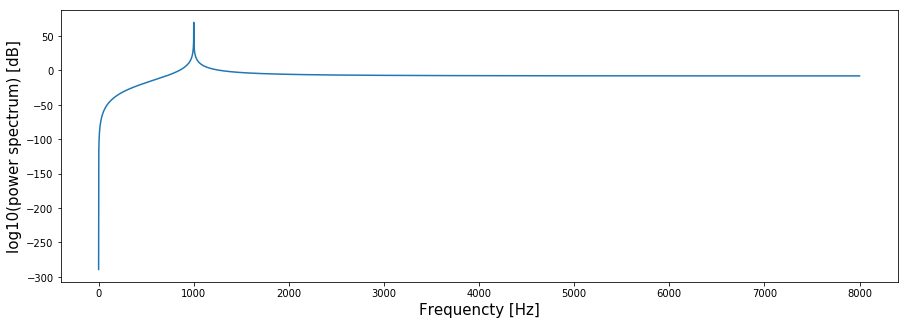

In [101]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(20*np.log10(abs(y_fourier)))
ax.set_xlabel(xlabel="Frequencty [Hz]",            fontsize=15)
ax.set_ylabel(ylabel="log10(power spectrum) [dB]", fontsize=15)
plt.show()

### matlab wavewrite
- [wavwrite (MATLAB Functions)](http://matlab.izmiran.ru/help/techdoc/ref/wavwrite.html)
  - > wavwrite(y,Fs,'filename') writes the data stored in the variable y to a WAVE file called filename.
    The data has a sample rate of Fs Hz and is assumed to be __16-bit__.
    Amplitude values outside the range [-1,+1] are clipped prior to writing.
- [python - How to generate audio from a numpy array? - Stack Overflow](https://stackoverflow.com/questions/10357992/how-to-generate-audio-from-a-numpy-array)
- [scipy.io.wavfile.write — SciPy v1.2.0 Reference Guide](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html)
  - scipyでは`float16`がなかったので`float32`で代用する

table : scipy.io.wavfile.write

| WAV    | format         | Min         | Max         | NumPy dtype |
| ---    | ---            | ---         | ---         | ---         |
| 32-bit | floating-point | -1.0        | +1.0        | float32     |
| 32-bit | PCM            | -2147483648 | +2147483647 | int32       |
| 16-bit | PCM            | -32768      | +32767      | int16       |
| 8-bit  | PCM            | 0           | 255         | uint8       |

In [108]:
# xの音声ファイル作成(再掲)
from scipy.io import wavfile

_wave_file = "./sample01_x.wav"
_x = np.float32(x)
wavfile.write(filename=_wave_file,
              rate=fs,  # サンプリング周波数
              data=_x)

In [109]:
# yの音声ファイル作成

_wave_file = "./sample01_y.wav"
_y = np.float32(y)
wavfile.write(filename=_wave_file,
              rate=fs,  # サンプリング周波数
              data=_y)